# 데이터 이해하기: 수치형 특성과 생존률의 관계

앞서 우리는 타이타닉 생존자 예측 대회에서 사용할 데이터 파일들을 살펴보았습니다. 성별만으로도 76.555%의 정확도를 달성할 수 있다는 것도 확인했죠. 이번에는 한 걸음 더 나아가 보겠습니다.

모델을 만들기 위해서는 먼저 데이터를 깊이 있게 이해하는 것이 중요합니다. 우리가 가진 train 데이터에는 어떤 패턴이 있을까요? 수치로 표현된 특성들(나이, 요금, 동승한 가족 수 등)은 생존과 어떤 관계가 있을까요? 이런 질문들에 대한 답을 찾아가면서, 자연스럽게 첫 번째 머신러닝 모델을 만들어보겠습니다.

이번 섹션에서는 다음과 같은 내용을 다룰 예정입니다:
1. 수치형 데이터의 통계적 특성 파악하기
2. 생존자와 사망자 그룹 간의 특성 비교하기

categorial한 특성(성별, 승선 항구 등)은 잠시 제쳐두고, 수치로 표현된 특성들만 사용해 보겠습니다. 이를 통해 데이터 분석의 기본적인 절차와 모델 생성 과정을 이해할 수 있을 것입니다.



## 데이터 세부 분석

데이터를 처음 마주했을 때 가장 먼저 해야 할 일은 데이터의 전반적인 특성을 파악하는 것입니다. pandas는 이를 위한 유용한 함수들을 제공합니다. 먼저 info() 함수를 통해 데이터의 기본 정보를 살펴보겠습니다.

📝 **프롬프트**
```
info() 함수를 사용해서 train 데이터의 기본 정보를 보여줘
```


💻 **코드 & 실행결과**

In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


info() 함수의 결과를 보면 몇 가지 중요한 점을 발견할 수 있습니다:

- 총 891개의 데이터(entries)가 있습니다.

- Age 컬럼에는 177개의 결측치가 있습니다 (714개만 non-null).
- Cabin 컬럼은 대부분이 결측치입니다 (687개가 결측).
- 데이터 타입은 int64(정수), float64(실수), object(문자열) 등 다양합니다.



이제 train 데이터의 통계적 특성을 살펴보겠습니다. describe() 함수는 기본 통계량을 계산해줍니다.

📝 **프롬프트**
```
describe() 함수를 사용해서 train 데이터의 통계를 보여줘
```

💻 **코드 & 실행결과**

In [2]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


describe() 함수는 각 수치형 컬럼에 대해 다음과 같은 정보를 제공합니다:

- count: 결측치가 아닌 값의 개수
- mean: 평균
- std: 표준편차
- min: 최솟값
- 25%, 50%(median), 75%: 사분위수
- max: 최댓값

눈에 띄는 점들을 살펴보면:

- 생존률(Survived)은 약 38.4%입니다.
- 승객의 평균 나이는 약 29.7세입니다.
- 요금(Fare)은 매우 큰 편차를 보입니다(0 ~ 512.33).



문자열(object) 타입 컬럼들의 특성도 살펴보겠습니다.

📝 **프롬프트**

```
train 데이터의 문자열(object) 타입 컬럼들에 대한 통계를 보여줘
```

💻 **코드 & 실행결과**

In [3]:
train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


문자열 데이터에 대해서는 다른 종류의 통계가 제공됩니다:

- count: 결측치가 아닌 값의 개수
- unique: 고유한 값의 개수
- top: 가장 많이 등장하는 값
- freq: top 값의 등장 횟수

특히 주목할 만한 점들은

- 성별(Sex)은 단 두 가지 값만 있습니다.
- 승선 항구(Embarked)는 대부분 S입니다.
- 객실 번호(Cabin)는 결측치가 매우 많고, 있는 값들도 매우 다양합니다.



## 생존자 비율 시각화하기

먼저 전체 승객 중 생존자의 비율이 어떻게 되는지 파이 차트로 확인해보겠습니다.

📝 **프롬프트**

```
train 데이터의 Survived 컬럼을 파이 차트로 보여줘. 생존자와 사망자의 비율을 알고 싶어
```

💻 **코드 & 실행결과**

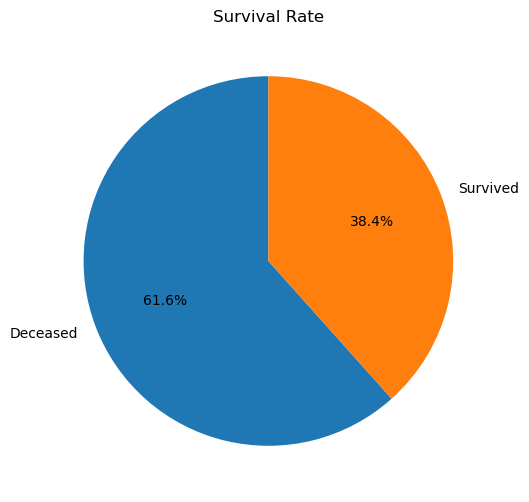

In [4]:
import matplotlib.pyplot as plt

# Pie chart of the 'Survived' column
survival_counts = train['Survived'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=['Deceased', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Rate')
plt.show()

파이 차트를 보면 흥미로운 사실을 알 수 있습니다:

- 전체 승객 중 61.6%가 사망했습니다.
- 생존한 승객은 38.4%입니다.

이 비율은 앞서 describe() 함수로 확인했던 생존률과 일치합니다. 시각화를 통해 보니 생존자가 사망자보다 훨씬 적다는 것을 한눈에 알 수 있네요.



## 상관계수 살펴보기

수치형 특성들 간의 관계를 파악하는 좋은 방법 중 하나는 상관계수를 확인하는 것입니다. 상관계수는 -1에서 1 사이의 값을 가지며, 두 특성이 얼마나 관련되어 있는지를 보여줍니다:

- 1에 가까울수록 강한 양의 상관관계 (한 특성이 증가하면 다른 특성도 증가)
- -1에 가까울수록 강한 음의 상관관계 (한 특성이 증가하면 다른 특성은 감소)
- 0에 가까울수록 상관관계가 약함 (두 특성이 거의 관련이 없음)

📝 **프롬프트**

```
train 데이터의 수치형 컬럼들 사이의 상관계수를 히트맵으로 그려줘
```

💻 **코드 & 실행결과**

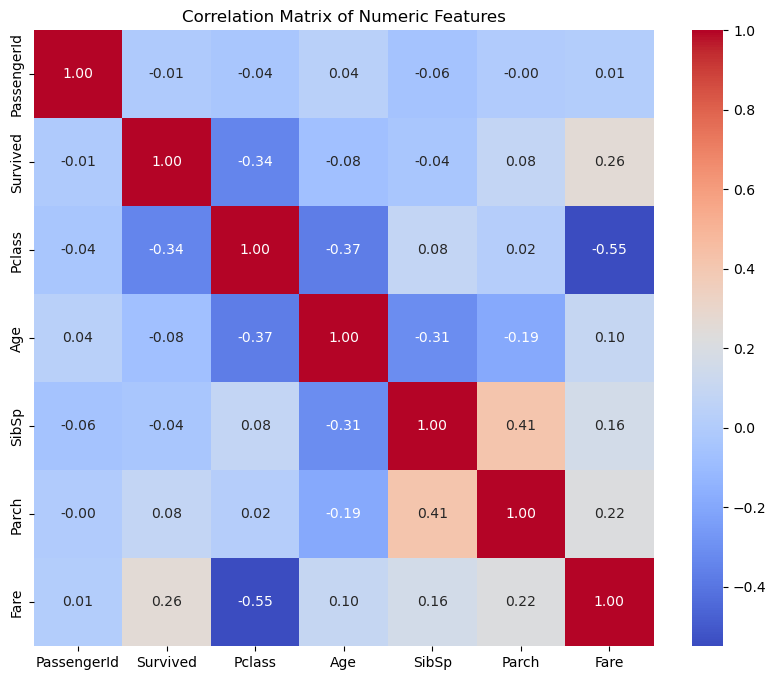

In [5]:
import seaborn as sns

# Identify numeric columns
numeric_cols = train.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
corr_matrix = train[numeric_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

히트맵을 보면 여러 가지 흥미로운 관계를 발견할 수 있습니다:

1. 생존(Survived)과 다른 특성들의 관계:
   - Pclass(객실 등급)와 음의 상관관계(-0.34): 등급이 좋을수록(숫자가 작을수록) 생존 확률이 높아집니다.
   - Fare(요금)와 양의 상관관계(0.26): 비싼 요금을 낸 승객일수록 생존 확률이 높아지는 경향이 있습니다.
   - Age(나이)와 약한 음의 상관관계(-0.07): 나이가 많을수록 생존 확률이 약간 낮아지는 정도입니다.
2. 다른 특성들 간의 관계:
   - Fare와 Pclass는 강한 음의 상관관계(-0.55): 당연히 좋은 등급의 객실일수록 요금이 비쌉니다.
   - SibSp(형제자매 수)와 Parch(부모자녀 수)는 양의 상관관계(0.41): 가족 단위 탑승객의 경우 두 값이 함께 증가하는 경향을 보입니다.

이러한 상관관계는 우리가 모델을 만들 때 중요한 힌트가 될 수 있습니다. 특히 Survived와의 상관관계가 높은 특성들(Pclass, Fare)은 승객의 생존 여부를 예측하는 데 유용할 것으로 보입니다.



## 수치형 특성과 생존률의 관계

상관계수를 통해 Pclass(객실 등급)가 생존 여부와 꽤 강한 관련성이 있다는 것을 확인했습니다. 이 관계를 시각화해서 좀 더 자세히 살펴보겠습니다. 

📝 **프롬프트**

```
train 데이터의 Pclass별 생존률을 막대그래프로 보여줘
```

💻 **코드 & 실행결과**

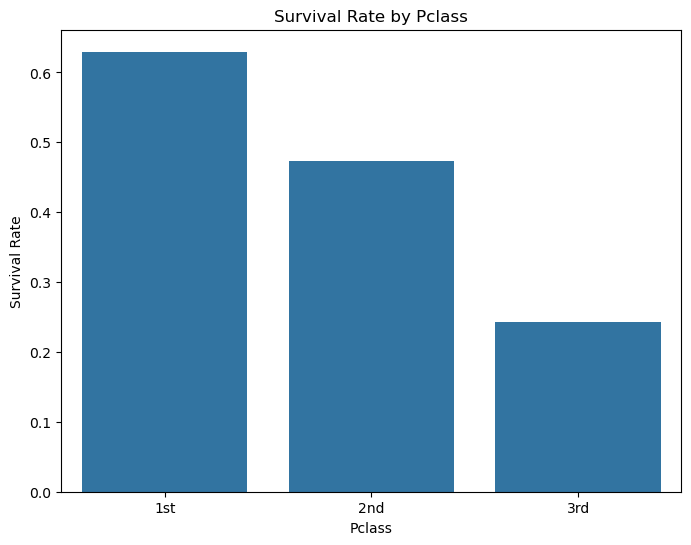

In [6]:
# Group by Pclass and calculate the mean of 'Survived'
pclass_survival = train.groupby('Pclass')['Survived'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=pclass_survival.index, y=pclass_survival.values)
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0,1,2], labels=['1st','2nd','3rd'])
plt.show()

그래프를 보면 객실 등급에 따른 생존률의 차이가 매우 뚜렷합니다:

- 1등급 승객의 생존률이 약 63%로 가장 높습니다.
- 2등급 승객의 생존률은 약 47%입니다.
- 3등급 승객의 생존률은 약 24%로, 1등급 승객의 절반도 안 됩니다.

이런 차이가 나타나는 이유는 무엇일까요? 1등급 객실은 대부분 상갑판에 위치해 있어 구명보트에 대한 접근성이 좋았을 것입니다. 또한 1등급 승객들은 선원들로부터 더 빠른 도움을 받았을 가능성도 있습니다.



📝 **직접 해보기** 위에서 살펴본 것처럼, 다른 수치형 특성들도 생존률과 관련이 있을까요? 아래 특성들에 대해서도 직접 시각화해보면 재미있는 패턴을 발견할 수 있을 것입니다:

- Age(나이)와 생존률의 관계
- Fare(요금)과 생존률의 관계
- SibSp(형제자매 수)와 생존률의 관계
- Parch(부모자녀 수)와 생존률의 관계